In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_df=pd.read_csv("height-weight.csv")
data_df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


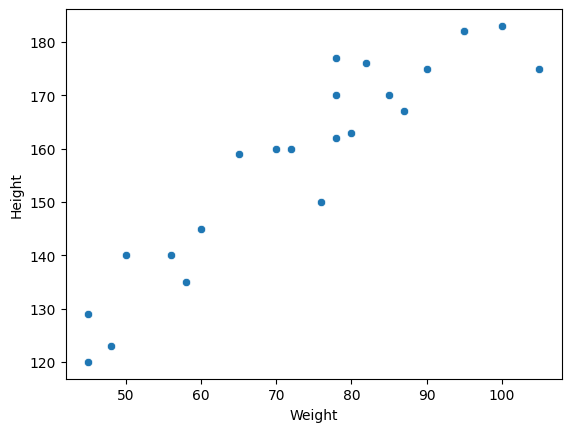

In [4]:
sns.scatterplot(data=data_df,x="Weight",y="Height")
plt.show() 
# linear relationship between height and weight

In [5]:
corr=data_df[["Weight","Height"]].corr()
corr

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


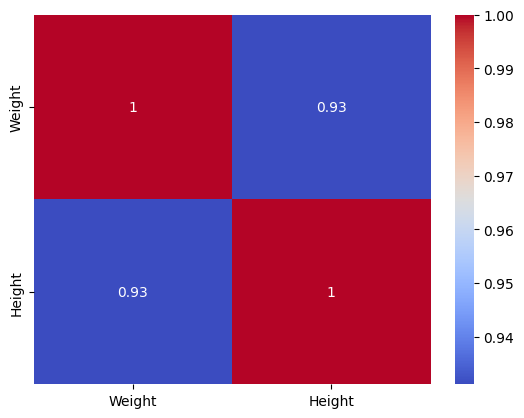

In [6]:
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

### Divide data into independent and dependent feaures

In [ ]:
# independent feature
X=data_df[["Weight"]] # independent features must be a dataframe or a 2D array
type(X)

pandas.core.frame.DataFrame

In [9]:
X_series=data_df["Weight"]
type(X_series)

pandas.core.series.Series

In [12]:
# dependent feature
Y=data_df["Height"] # dependent feature can be a Series or 1D array
Y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

### Train Test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
X_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [16]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [17]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [18]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

### Standardization on independent features: Calculate z-score to convert all features into same unit

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale=StandardScaler()

In [21]:
X_train=scale.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [22]:
X_test=scale.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

### Apply Simple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression_model=LinearRegression(n_jobs=-1) # using all the processors for convergence

In [26]:
regression_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
print(f"Co-efficient or slope: {regression_model.coef_}")

Co-efficient or slope: [17.2982057]


In [31]:
print(f"Value of intercept: {regression_model.intercept_}")

Value of intercept: 156.47058823529412


### Let's see our best fit line

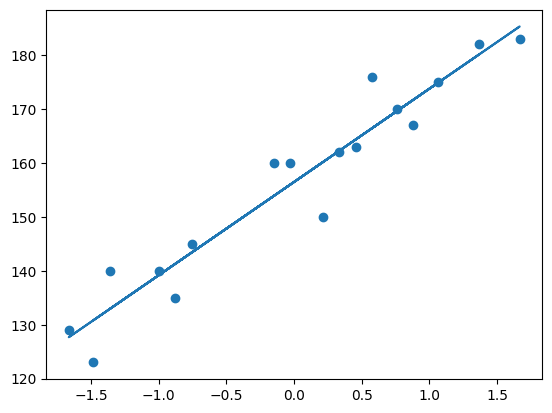

In [40]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_train,regression_model.predict(X_train))
plt.show()

### Prediction for test data

In [41]:
y_pred=regression_model.predict(X_test)

In [42]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

#### It follows this relation 
#### y_pred=(156.47) + (17.29)*(X_test)

### Now that we have done the prediction, let's go ahead and see the performance metrics

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [45]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
Root Mean Squared Error: 10.716374991212605


## R Squared

## R^2=1-(SSR/SST)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r_sq=r2_score(y_test,y_pred)
print(f"R squared value: {r_sq}")

R squared value: 0.7360826717981276


## Adjusted R Squared
### adjusted R2=1-[(1-R2)(N-1)/(N-P-1)]

In [50]:
ad_r2=1-((1-r_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"Adjusted R squared value: {ad_r2}")

Adjusted R squared value: 0.6701033397476595


## OLS Technique

In [51]:
import statsmodels.api as sm

In [52]:
model=sm.OLS(y_train,X_train).fit()

In [53]:
prediction=model.predict(X_test)

In [54]:
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 01 Aug 2025   Prob (F-statistic):                       0.664
Time:                        22:40:02   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

e:\ml-bootcamp\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Prediction for New Input

In [57]:
# firstly dont forget to standardize the new input
new_input=75

In [58]:
regression_model.predict(scale.transform([[new_input]]))

e:\ml-bootcamp\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([159.12122213])